### Importing modules

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


### Loading the data

In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
# Make a dataframe
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

# Set how many rows are set in the dataframe
pd.set_option('display.min_rows', 10) 
pd.set_option('display.max_rows', 10) 

# Show the dataframe
display(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Histogram plots of male and female survival rates for different ages

Text(0, 0.5, 'Number of people')

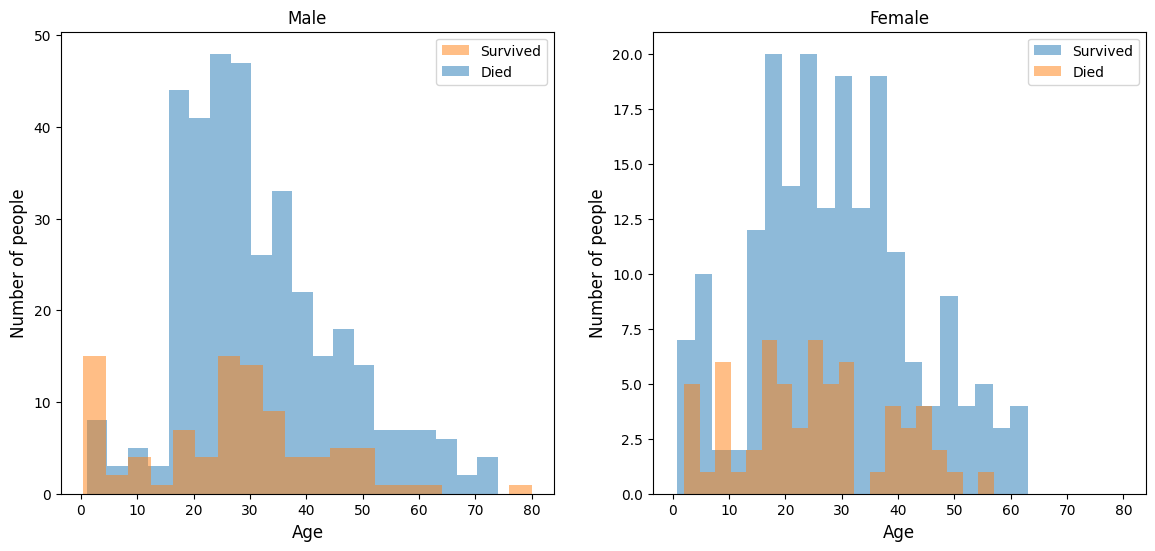

In [4]:
male_train_df = train_df.loc[train_df['Sex'] == 'male']
female_train_df = train_df.loc[train_df['Sex'] == 'female']

male_survived_df = male_train_df.loc[male_train_df['Survived'] == 1]
male_died_df = male_train_df.loc[male_train_df['Survived'] == 0]

female_survived_df = female_train_df.loc[female_train_df['Survived'] == 1]
female_died_df = female_train_df.loc[female_train_df['Survived'] == 0]


fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(14,6), sharex=True)

histogram_male_survived = ax0.hist(male_survived_df['Age'], bins=20, alpha=0.5,  label='Survived', color='C1', zorder=1);
histogram_male_died = ax0.hist(male_died_df['Age'], bins=20, alpha=0.5,  label='Died', color='C0', zorder=0);

histogram_female_survived = ax1.hist(female_survived_df['Age'], bins=20, alpha=0.5,  label='Survived');
histogram_female_died = ax1.hist(female_died_df['Age'], bins=20, alpha=0.5,  label='Died');

# Add a legend to ax0
ax0.legend()
ax1.legend()

ax0.set(title='Male', xlabel='Age', ylabel='Number of people');
ax1.set(title='Female', xlabel='Age', ylabel='Number of people');

ax0.set_xlabel('Age', fontsize = 12)
ax0.set_ylabel('Number of people', fontsize = 12)
ax1.set_xlabel('Age', fontsize = 12)
ax1.set_ylabel('Number of people', fontsize = 12)

Text(0, 0.5, 'Number of people')

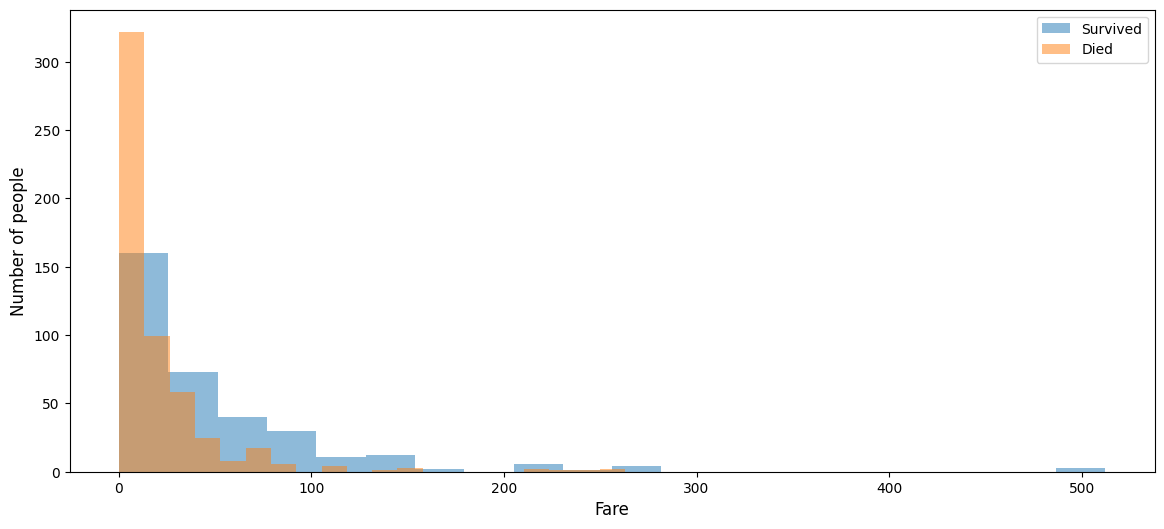

In [5]:
# Plot histograms of the Number who survived/died according to fare price
survived_df = train_df.loc[train_df['Survived'] == 1]
died_df = train_df.loc[train_df['Survived'] == 0]

fig, ax = plt.subplots(figsize=(14,6))

survived_hist = ax.hist(survived_df['Fare'], bins=20, alpha=0.5,  label='Survived', color='C0', zorder=0);
died_ = ax.hist(died_df['Fare'], bins=20, alpha=0.5,  label='Died', color='C1', zorder=1);

# Add a legend to ax0
ax.legend()

ax.set_xlabel('Fare', fontsize = 12)
ax.set_ylabel('Number of people', fontsize = 12)

In [6]:
import re 

# New data frame to work with
new_train_df = train_df.copy(deep=True)

# Function to create a new column with the title of each passenger
new_train_df['Title'] = new_train_df['Name'].map(lambda x: re.compile(", (.*?)\.").findall(x)[0])

# Allocate uncommon titles to broader title categories
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady', 'Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

deck = {"A": "A", "B": "B", "C": "C", "D": "D", "E": "E", "F": "F", "G": "G", "U": "U"}

# Function to replace the cabin code with their deck section, denoted by a letter
def replace_cabin(x):
    x['Cabin'] = x['Cabin'].fillna("U0")
    x['Deck'] = x['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    x['Deck'] = x['Deck'].map(deck)
    x['Deck'] = x['Deck'].fillna("U")
    x.drop('Cabin',axis=1, inplace=True)
    
    return x

# Show the new altered dataframes with 'Title' and 'Deck' columns
new_train_df['Title']=new_train_df.apply(replace_titles, axis=1)
new_train_df= replace_cabin(new_train_df)

new_train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Mr,U
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,Miss,U
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr,C


In [7]:
# Import the methods for pipeline processing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

# Function to take a dataframe and prepare it for training. It imputes (fills missing values) for"Age" and "Fare", 
# makes the "Cabin" and "Sex" column binary (i.e in a cabin or not, male or female) and one hot encodes the "Embarked",
# "Title" and "Deck" column. 

def prepare_dataframe(df, drop_columns):
    # Copying dataframe to manipulate
    new_df = df.copy(deep=True)
    
    # Binary mapping the sex column
    binary_mapping = {"male" : 0, "female": 1}
    new_df["Sex"] = new_df["Sex"].map(binary_mapping)
    
    # Creating the new Title and Deck columns
    new_df['Title'] = new_df['Name'].map(lambda x: re.compile(", (.*?)\.").findall(x)[0])
    new_df['Title'] = new_df.apply(replace_titles, axis=1)
    
    new_df = replace_cabin(new_df)
    
    # Numeric and categorical features to encode
    numeric_features = ["Fare"]
    categorical_features = ["Embarked", "Title", "Deck"]
    
    # Strategies for transforming these features
    numeric_transformer = Pipeline(steps = [("imputer", SimpleImputer(strategy="mean"))])
    
    categorical_transformer = Pipeline(steps = [ ("imputer", SimpleImputer(strategy = "constant", 
                                                                           fill_value="missing")),
                                               ("onehot", OneHotEncoder(handle_unknown="ignore"))])
    # Transforming these features    
    preprocessor = ColumnTransformer(transformers = [("num", numeric_transformer, numeric_features),
                                                    ("cat", categorical_transformer, categorical_features)])
    
    preprocessor.fit(new_df)
    
    transformed_data = preprocessor.transform(new_df)
    
    # Getting transformed data and creating new columns to put them in 
    numeric_data = transformed_data[:, :len(numeric_features)].toarray()
    categorical_data = transformed_data[:, len(numeric_features):].toarray()
        
    categorical_encoded_features = preprocessor.named_transformers_['cat']['onehot'] \
                                    .get_feature_names_out(input_features=categorical_features)
    
    # Replace the columns with transformed data
    new_df[categorical_encoded_features] = categorical_data
    new_df[numeric_features] = numeric_data
    
    X = new_df[['SibSp', 'Fare', 'Age', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Pclass', 'Sex']]

    impute_knn = KNNImputer()
    X_imputed = impute_knn.fit_transform(X)

    X_df = pd.DataFrame(X_imputed)
    age_column = X_df.iloc[:,2]
    new_df['Age'] = age_column
    
    # Removing obsolete features which have been transformed 
    if "Embarked_missing" in new_df.columns:
        new_df.drop("Embarked_missing", axis=1, inplace=True)
    if "Title" in new_df.columns:
        new_df.drop("Title", axis=1, inplace=True)
    if "Deck" in new_df.columns:
        new_df.drop("Deck", axis=1, inplace=True)
    
    # Dropping custom columns according to which features we want to include in a model
    new_df.drop(drop_columns,axis =1, inplace=True)
    
    return pd.DataFrame(new_df)

In [8]:
# Custom columns to drop in the function prepare_dataframe
drop_columns = ["Embarked", "Ticket", "Name", "PassengerId"]
new_train_df = prepare_dataframe(train_df, drop_columns)
# display(new_train_df)
print(new_train_df.columns)
new_train_df['Age'].isna().sum()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_U'],
      dtype='object')


0

0
177


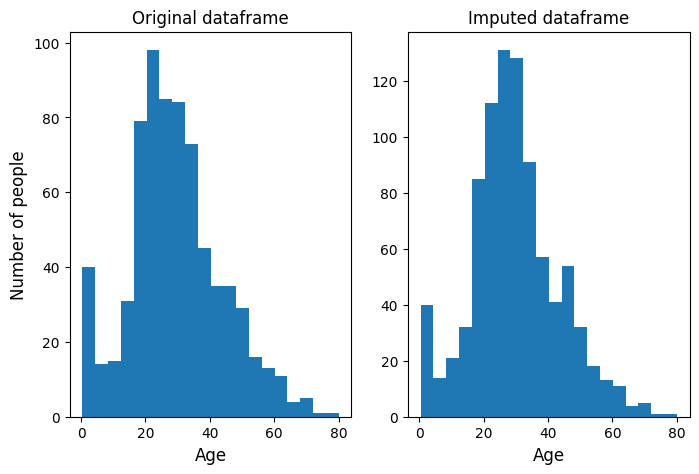

In [9]:
# Columns to drop in preparing the dataframes
drop_columns = ["Embarked", "Ticket", "Name", "PassengerId"]

new_train_df = prepare_dataframe(train_df, drop_columns)
new_test_df = prepare_dataframe(test_df, drop_columns)

#Plotting histograms of the feature variables
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = (8,5))

# Create histograms
ax0.hist(train_df["Age"], bins=20);
ax1.hist(new_train_df["Age"], bins=20);

# Set labels
ax0.set_xlabel('Age', fontsize = 12)
ax0.set_ylabel('Number of people', fontsize = 12)
ax1.set_xlabel('Age', fontsize = 12)
ax0.set_title('Original dataframe')
ax1.set_title('Imputed dataframe')

print(new_train_df["Age"].isna().sum())
print(train_df["Age"].isna().sum())

In [10]:
# Quick fitting of the data
from sklearn.metrics import accuracy_score

# Setup the random seed
np.random.seed(42)

# Prepare dataframes
new_train_df = prepare_dataframe(train_df, drop_columns)
new_test_df = prepare_dataframe(test_df, drop_columns)

# First RandomForestClassifier 

# Split up into feature variables and target variables
x_train = new_train_df.drop(["Survived"], axis=1)
y_train = new_train_df["Survived"]
x_test = new_test_df

# Import randomforestclassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

# Predictions of the training data
y_preds = clf.predict(x_train)

print(accuracy_score(y_preds, y_train))

0.9854096520763187


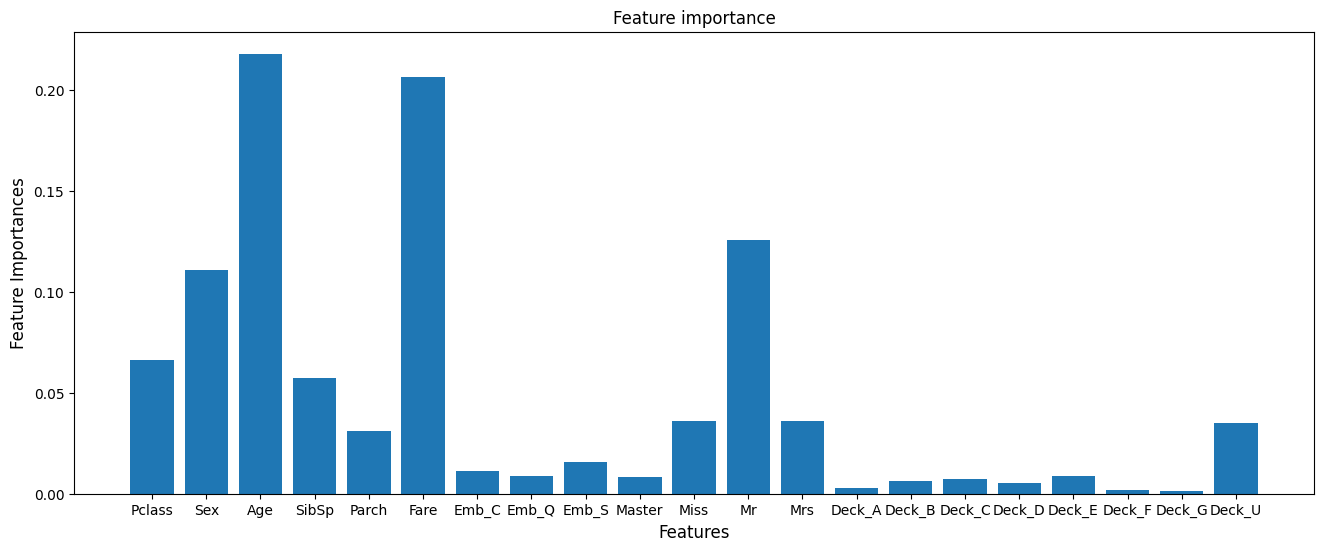

In [11]:
# Gives the importance of different features of the model
importance = clf.feature_importances_

# Shortened columns to appear on one plot
columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Emb_C',
       'Emb_Q', 'Emb_S', 'Master', 'Miss', 'Mr',
       'Mrs', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F',
       'Deck_G', 'Deck_U']

# The importance of the different feautures according to the model
importance_dictionary = {columns[i] : importance[i] for i in range(len(importance)) }
importance

keys = importance_dictionary.keys()
values = importance_dictionary.values()

# Plotting the feature importance
plt.figure(figsize=(16, 6))
plt.bar(keys, values)
plt.xlabel('Features', size=12)
plt.ylabel('Feature Importances', size=12)
plt.title('Feature importance')
plt.show()

In [12]:
original_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Emb_C',
       'Emb_Q', 'Emb_S', 'Master', 'Miss', 'Mr',
       'Mrs', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F',
       'Deck_G', 'Deck_U']

In [13]:
# Import important modules
from  sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.base import clone

# Setup Random Seed
np.random.seed(42)

# Random Forest model, not including all the features below
drop_columns_cabin = ["Embarked", "Ticket", "Name", "PassengerId", 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_U']

# Print which columns we are including 
print(set(original_columns)-set(drop_columns_cabin))

# Grid of hyperparameters to sample from
grid = {
    'n_estimators': [100, 500, 1000, 2000],
    'max_depth': [None, 10, 20, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True, False]
}
 

# Setup the random seed
np.random.seed(42)

# Creating dataframes discluding the cabins and titles 
x_train_cabin = prepare_dataframe(train_df, drop_columns_cabin).drop(["Survived"], axis=1)
y_train = new_train_df["Survived"]
x_test_cabin = prepare_dataframe(test_df, drop_columns_cabin)

# Instantiating Random forest classifier
clf = RandomForestClassifier(n_jobs = 1)

# Setting up randomised search of hyperparameters (considers 10 combinations) with cross validation
rs_clf = RandomizedSearchCV(estimator = clf, param_distributions=grid,
                       n_iter = 10, # number of models to try
                       cv = 5, # Setting the test set as the validation set
                       verbose =2 # Prints out logs as it is running
                       )
# Fit the classifier
rs_clf.fit(x_train_cabin, y_train);
# Best parameters of the 10 iterations
best_params_cabin = rs_clf.best_params_
# Dataframe of the results of each hyperparameter combination
cv_results_cabin = rs_clf.cv_results_

{'Parch', 'Mrs', 'Mr', 'Master', 'Age', 'Emb_S', 'Fare', 'Miss', 'SibSp', 'Emb_Q', 'Emb_C', 'Pclass', 'Sex'}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] E

{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
0.820790283095851


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.073463,0.021814,0.040077,0.001944,500,10,1,sqrt,10,True,"{'n_estimators': 500, 'min_samples_split': 10,...",0.804469,0.803371,0.853933,0.797753,0.853933,0.822692,0.025610,6
1,0.994441,0.014845,0.040723,0.000672,500,2,2,sqrt,None,False,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.787709,0.808989,0.870787,0.780899,0.831461,0.815969,0.032626,8
2,0.202138,0.003618,0.011478,0.000664,100,5,1,sqrt,40,False,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.782123,0.792135,0.831461,0.769663,0.842697,0.803616,0.028458,10
3,2.173085,0.069160,0.076413,0.002662,1000,5,1,sqrt,10,True,"{'n_estimators': 1000, 'min_samples_split': 5,...",0.804469,0.803371,0.870787,0.803371,0.853933,0.827186,0.029212,1
4,0.948770,0.013540,0.040723,0.001648,500,2,1,sqrt,10,False,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.776536,0.792135,0.853933,0.792135,0.848315,0.812611,0.032007,9
5,1.056405,0.005929,0.039069,0.000797,500,10,1,sqrt,None,True,"{'n_estimators': 500, 'min_samples_split': 10,...",0.804469,0.792135,0.865169,0.814607,0.848315,0.824939,0.027447,5
6,2.124349,0.033740,0.074953,0.002095,1000,10,1,sqrt,10,True,"{'n_estimators': 1000, 'min_samples_split': 10...",0.787709,0.803371,0.870787,0.808989,0.859551,0.826081,0.032861,2
7,0.190846,0.004235,0.010413,0.000540,100,5,4,sqrt,None,False,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.821229,0.797753,0.859551,0.803371,0.848315,0.826044,0.024316,4
8,1.106175,0.016934,0.040548,0.000993,500,5,1,sqrt,20,True,"{'n_estimators': 500, 'min_samples_split': 5, ...",0.804469,0.808989,0.865169,0.786517,0.848315,0.822692,0.029289,6
9,3.759996,0.029345,0.151273,0.003724,2000,2,2,sqrt,10,False,"{'n_estimators': 2000, 'min_samples_split': 2,...",0.793296,0.808989,0.876404,0.803371,0.848315,0.826075,0.031335,3


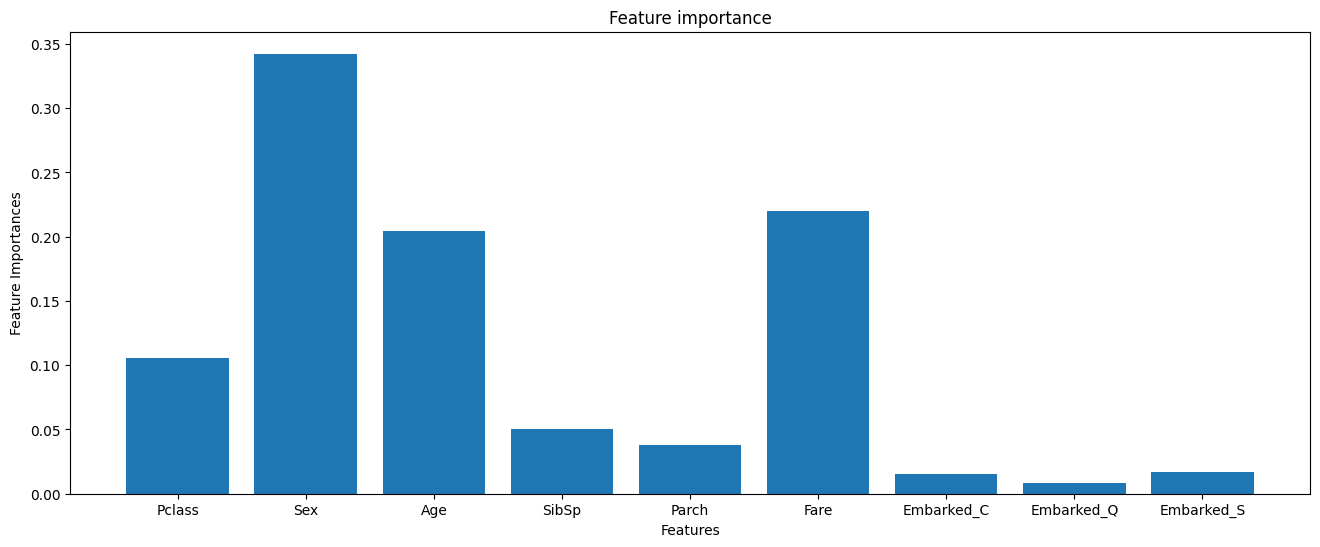

In [14]:
# Results of the cross validation 
pd.set_option('display.min_rows', 20) 
pd.set_option('display.max_rows', 20) 

# The best performing parameter, and the mean score of the 10 combinations
print(best_params_cabin)
print(cv_results_cabin["mean_test_score"].mean())

# Results of the 10 iterations
cv_results_cabin_df = pd.DataFrame(cv_results_cabin)
display(cv_results_cabin_df)

# Feature importances according to the classifier
importance = rs_clf.best_estimator_.feature_importances_
importance_dictionary = {x_train_cabin.columns[i] : importance[i] for i in range(len(importance)) }

keys = importance_dictionary.keys()
values = importance_dictionary.values()

# Plot the feature importance
plt.figure(figsize=(16, 6))
plt.bar(keys, values)
plt.xlabel('Features')
plt.ylabel('Feature Importances')
plt.title('Feature importance')
plt.show()

In [15]:
# Setup the random seed
np.random.seed(42)

# Random forest model not discluding all the features below
drop_columns_titles = ["Embarked", "Ticket", "Name", "PassengerId", 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', \
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_U']

# Print which columns we are including 
print(set(original_columns)-set(drop_columns_titles))

# Grid of hyperparameters to sample from
grid = {
    'n_estimators': [100, 500, 1000, 2000],
    'max_depth': [None, 10, 20, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True, False]
}
 
# Creating dataframes discluding the titles
x_train_titles = prepare_dataframe(train_df, drop_columns_titles).drop(["Survived"], axis=1)
y_train = new_train_df["Survived"]
x_test_titles = prepare_dataframe(test_df, drop_columns_titles)

# Instantiating the Random Forest Classifier
clf = RandomForestClassifier(n_jobs = 1)

# Setting up randomised search of hyperparameters (considers 10 combinations) with cross validation
rs_clf_titles = RandomizedSearchCV(estimator = clf, param_distributions=grid,
                       n_iter = 10, # number of models to try
                       cv = 5, # Setting the test set as the validation set
                       verbose =2 # Prints out information as it is running
                       )
# Fit the classifier
rs_clf_titles.fit(x_train_titles, y_train);
# Best parameters of the 10 iterations
best_params_titles = rs_clf_titles.best_params_
# Dataframe of the results of each hyperparameter combination
cv_results_titles = rs_clf_titles.cv_results_

{'Parch', 'Mrs', 'Mr', 'Master', 'Age', 'Emb_S', 'Fare', 'Miss', 'SibSp', 'Emb_Q', 'Emb_C', 'Pclass', 'Sex'}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] E

{'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
0.8227945515033583


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.049442,0.009937,0.042367,0.005039,500,10,1,sqrt,10,True,"{'n_estimators': 500, 'min_samples_split': 10,...",0.810056,0.792135,0.859551,0.808989,0.853933,0.824933,0.026798,6
1,0.938975,0.004822,0.041112,0.001082,500,2,2,sqrt,None,False,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.821229,0.803371,0.870787,0.764045,0.831461,0.818178,0.034937,9
2,0.199233,0.003186,0.013078,0.001311,100,5,1,sqrt,40,False,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.782123,0.797753,0.837079,0.764045,0.825843,0.801368,0.027021,10
3,2.087064,0.016750,0.076191,0.001274,1000,5,1,sqrt,10,True,"{'n_estimators': 1000, 'min_samples_split': 5,...",0.804469,0.803371,0.865169,0.808989,0.848315,0.826062,0.025679,5
4,0.925203,0.013150,0.040122,0.001297,500,2,1,sqrt,10,False,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.798883,0.803371,0.859551,0.792135,0.837079,0.818204,0.025841,8
5,1.042023,0.007020,0.039159,0.000976,500,10,1,sqrt,None,True,"{'n_estimators': 500, 'min_samples_split': 10,...",0.826816,0.792135,0.865169,0.808989,0.859551,0.830532,0.028263,1
6,2.056382,0.052853,0.074626,0.002642,1000,10,1,sqrt,10,True,"{'n_estimators': 1000, 'min_samples_split': 10...",0.826816,0.792135,0.865169,0.803371,0.853933,0.828284,0.028099,3
7,0.186572,0.009899,0.010452,0.000321,100,5,4,sqrt,None,False,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.826816,0.797753,0.859551,0.808989,0.853933,0.829408,0.024231,2
8,1.073669,0.012640,0.040371,0.000649,500,5,1,sqrt,20,True,"{'n_estimators': 500, 'min_samples_split': 5, ...",0.804469,0.803371,0.870787,0.786517,0.853933,0.823815,0.032548,7
9,3.594752,0.072883,0.151691,0.003221,2000,2,2,sqrt,10,False,"{'n_estimators': 2000, 'min_samples_split': 2,...",0.826816,0.792135,0.870787,0.797753,0.848315,0.827161,0.029808,4


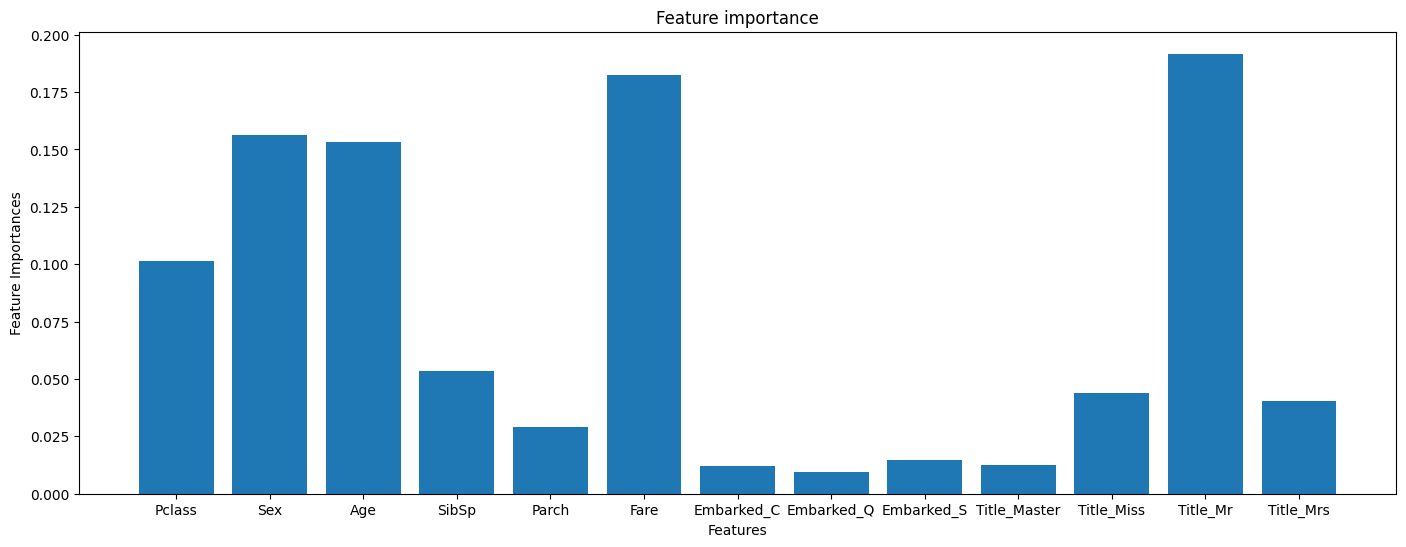

In [16]:
# Results of the cross validation 
print(best_params_titles)
print(cv_results_titles["mean_test_score"].mean())

# Dataframe results of the 10 iterations
cv_results_titles_df = pd.DataFrame(cv_results_titles)
display(cv_results_titles_df)


# Feature importances according to the classifier
importance = rs_clf_titles.best_estimator_.feature_importances_
importance_dictionary = {x_train_titles.columns[i] : importance[i] for i in range(len(importance)) }

keys = importance_dictionary.keys()
values = importance_dictionary.values()

# Plot the feature importance
plt.figure(figsize=(17, 6))
plt.bar(keys, values)
plt.xlabel('Features')
plt.ylabel('Feature Importances')
plt.title('Feature importance')
plt.show()

In [17]:
# Setup the random seed 
np.random.seed(42)

# # Random forest model discluding all the features below
drop_columns_decks = ["Embarked", "Ticket", "Name", "PassengerId"]

# Print which columns we are including 
print(set(original_columns)-set(drop_columns_decks))

# Grid of hyperparameters to sample from
grid = {
    'n_estimators': [100, 500, 1000, 2000],
    'max_depth': [None, 10, 20, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True, False]
}

# Creating dataframes discluding the titles
x_train_decks = prepare_dataframe(train_df, drop_columns_decks).drop(["Survived"], axis=1)
y_train = new_train_df["Survived"]
x_test_decks = prepare_dataframe(test_df, drop_columns_decks)

# Instantiating the Random Forest Classifier
clf = RandomForestClassifier(n_jobs = 1)

# Setting up randomised search of hyperparameters (considers 10 combinations) with cross validation
rs_clf_decks = RandomizedSearchCV(estimator = clf, param_distributions=grid,
                       n_iter = 10, # number of models to try
                       cv = 5, # Setting the test set as the validation set
                       verbose =2 # Prints out information as it is running
                       )
# Fit the classifier
rs_clf_decks.fit(x_train_decks, y_train);
# Best parameters of the 10 iterations
best_params_decks = rs_clf_decks.best_params_
# Dataframe of the results of each hyperparameter combination
cv_results_decks = rs_clf_decks.cv_results_

{'Mr', 'Deck_D', 'Deck_E', 'Emb_S', 'Deck_G', 'Fare', 'Miss', 'Deck_C', 'Deck_B', 'Emb_Q', 'Mrs', 'Emb_C', 'Parch', 'Master', 'Deck_A', 'Age', 'Deck_U', 'SibSp', 'Pclass', 'Deck_F', 'Sex'}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
0.8244567196032893


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.044568,0.029649,0.040618,0.002917,500,10,1,sqrt,10,True,"{'n_estimators': 500, 'min_samples_split': 10,...",0.826816,0.786517,0.853933,0.808989,0.842697,0.823790,0.024015,6
1,0.958161,0.017876,0.042546,0.001776,500,2,2,sqrt,None,False,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.832402,0.780899,0.859551,0.786517,0.848315,0.821537,0.032119,8
2,0.206201,0.004988,0.012437,0.000485,100,5,1,sqrt,40,False,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.821229,0.786517,0.831461,0.764045,0.842697,0.809190,0.029379,10
3,2.141264,0.039786,0.078837,0.002582,1000,5,1,sqrt,10,True,"{'n_estimators': 1000, 'min_samples_split': 5,...",0.843575,0.803371,0.848315,0.803371,0.848315,0.829389,0.021314,3
4,0.946417,0.027568,0.040488,0.001033,500,2,1,sqrt,10,False,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.815642,0.797753,0.859551,0.792135,0.842697,0.821555,0.025914,7
5,1.075165,0.012148,0.041528,0.001107,500,10,1,sqrt,None,True,"{'n_estimators': 500, 'min_samples_split': 10,...",0.837989,0.786517,0.865169,0.808989,0.848315,0.829396,0.028166,2
6,2.038831,0.028242,0.074772,0.001001,1000,10,1,sqrt,10,True,"{'n_estimators': 1000, 'min_samples_split': 10...",0.826816,0.797753,0.859551,0.803371,0.842697,0.826037,0.023303,5
7,0.181101,0.004044,0.010877,0.000721,100,5,4,sqrt,None,False,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.849162,0.808989,0.848315,0.814607,0.859551,0.836125,0.020331,1
8,1.080528,0.012064,0.041859,0.001551,500,5,1,sqrt,20,True,"{'n_estimators': 500, 'min_samples_split': 5, ...",0.832402,0.775281,0.842697,0.792135,0.848315,0.818166,0.029086,9
9,3.566111,0.028942,0.154726,0.002918,2000,2,2,sqrt,10,False,"{'n_estimators': 2000, 'min_samples_split': 2,...",0.849162,0.797753,0.859551,0.803371,0.837079,0.829383,0.024648,4


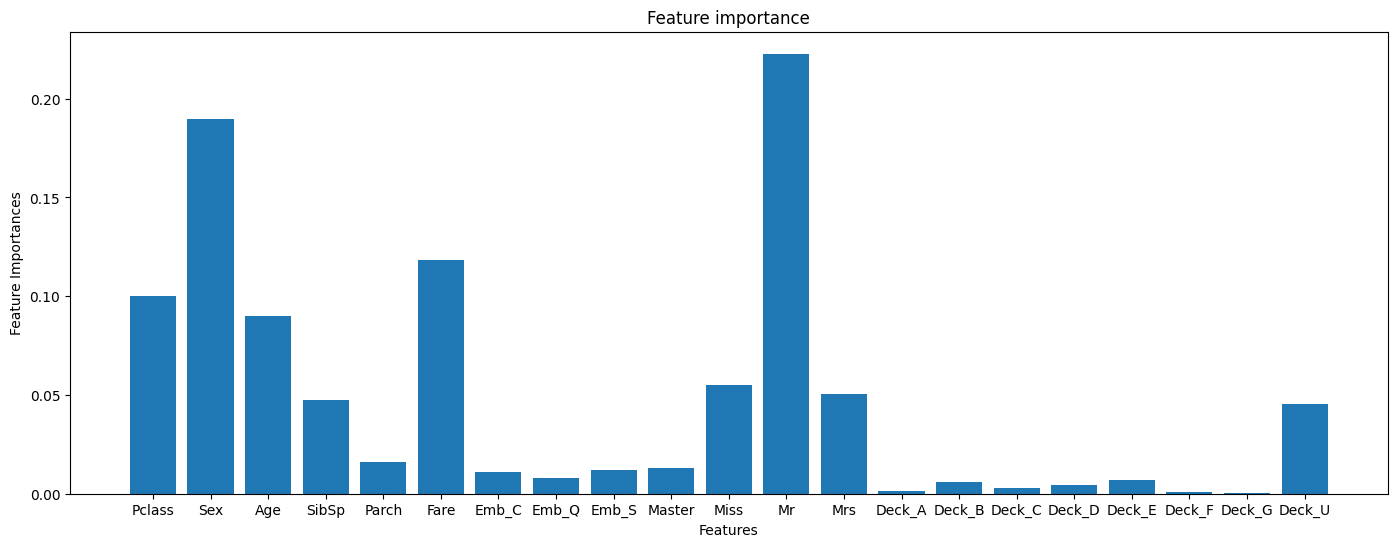

In [18]:
# Results of the cross validation
print(best_params_decks)
print(cv_results_decks["mean_test_score"].mean())

# Dataframe results of the 10 iterations
cv_results_decks_df = pd.DataFrame(cv_results_decks)
display(cv_results_decks_df)

importance = rs_clf_decks.best_estimator_.feature_importances_

# Custom columns to fit in the plot (previous labels too long)
columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Emb_C',
       'Emb_Q', 'Emb_S', 'Master', 'Miss', 'Mr',
       'Mrs', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F',
       'Deck_G', 'Deck_U']

# Feature importances according to the classifier
importance_dictionary = {columns[i] : importance[i] for i in range(len(importance)) }
importance

keys = importance_dictionary.keys()
values = importance_dictionary.values()

# Plot the feature importance
plt.figure(figsize=(17, 6))
plt.bar(keys, values)
plt.xlabel('Features')
plt.ylabel('Feature Importances')
plt.title('Feature importance')
plt.show()

In [19]:
# Import important functions
from  sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

# Setup random seed
np.random.seed(42)

# Function to divide a dataframe into validation and training sets with cross validation (k-folds). Returns the desired fold  
def cross_val_index(k_folds, x_dataframe, y_dataframe, fold_number):
    index = round(len(x_dataframe)/k_folds)
    start_index, end_index = [], []
    for i in range(k_folds):
                start_index.append(i * index)
                end_index.append((i + 1) * index if i < k_folds - 1 else len(x_dataframe))
    print(start_index[fold_number-1], end_index[fold_number-1])
    X_train = pd.concat([x_dataframe[:start_index[fold_number-1]], x_dataframe[end_index[fold_number-1]:]])
    y_train = pd.concat([y_dataframe[:start_index[fold_number-1]], y_dataframe[end_index[fold_number-1]:]])
    X_valid = x_dataframe[start_index[fold_number-1]:end_index[fold_number-1]]
    y_valid = y_dataframe[start_index[fold_number-1]:end_index[fold_number-1]]
    print(len(X_valid), len(y_valid))
    
    return X_train, y_train, X_valid, y_valid



drop_columns = ["Embarked", "Ticket", "Name", "PassengerId"]

# Setting up validation dataframes
new_train_df = prepare_dataframe(train_df, drop_columns)
x_train = new_train_df.drop(["Survived"], axis=1)
y_train = new_train_df["Survived"]

cross_val_dataframes = cross_val_index(5, x_train, y_train, 5)

# Calculating the probabilities of prediction with the best RandomForestClassifier
best_clf = RandomForestClassifier( **{'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False})
best_clf.fit(cross_val_dataframes[0], cross_val_dataframes[1])
best_y_valid_preds = best_clf.predict(cross_val_dataframes[2])
best_y_valids_proba = best_clf.predict_proba(cross_val_dataframes[2])
best_y_valids_proba_pos = best_y_valids_proba[:, 1]
print(accuracy_score(best_y_valid_preds, cross_val_dataframes[3]))

# Calculating the probabilities of prediction with the worst RandomForestClassifier
worst_clf = RandomForestClassifier( **{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False})
worst_clf.fit(cross_val_dataframes[0], cross_val_dataframes[1])
worst_y_valid_preds = worst_clf.predict(cross_val_dataframes[2])
worst_y_valids_proba = worst_clf.predict_proba(cross_val_dataframes[2])
worst_y_valids_proba_pos = worst_y_valids_proba[:, 1]
print(accuracy_score(worst_y_valid_preds, cross_val_dataframes[3]))

# Calculating the rates and thresholds for the two classifiers
best_fpr, best_tpr, best_thresholds = roc_curve(cross_val_dataframes[3].values, best_y_valids_proba_pos)
worst_fpr, worst_tpr, worst_thresholds = roc_curve(cross_val_dataframes[3].values, worst_y_valids_proba_pos)

712 891
179 179
0.8547486033519553
0.8379888268156425


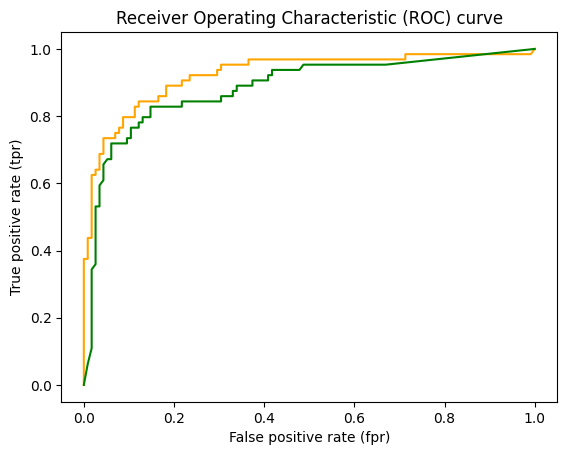

In [20]:
# Plotting the ROC curves fo rhte best and worst classifiers 
plt.plot(best_fpr, best_tpr, color='orange', label='ROC')
plt.plot(worst_fpr, worst_tpr, color='green', label='ROC')
plt.xlabel('False positive rate (fpr)')
plt.ylabel('True positive rate (tpr)')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.show()

In [21]:
# Submitting a prediction 

# Dropping only unnecessary columns
drop_columns = ["Embarked", "Ticket", "Name", "PassengerId"]

# Prepare dataframes
new_train_df = prepare_dataframe(train_df, drop_columns)
x_train = new_train_df.drop(["Survived"], axis=1)
y_train = new_train_df["Survived"]
x_test = prepare_dataframe(test_df, drop_columns)

# Instantiate Random Forest Classifier with best hyperparameters
best_clf = RandomForestClassifier( **{'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt',
                                      'max_depth': 40, 'bootstrap': False})
best_clf.fit(x_train, y_train)
best_y_preds = best_clf.predict(x_test)

# Fit the classifier and make predictions
clf.fit(x_train, y_train)
best_y_preds = clf.predict(x_test)

# Create a csv file with the predictions
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': best_y_preds})
print(output)
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
5            897         0
6            898         0
7            899         0
8            900         1
9            901         0
..           ...       ...
408         1300         1
409         1301         1
410         1302         1
411         1303         1
412         1304         0
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
Your submission was successfully saved!


In [22]:
# Quick fitting of the data for a logistic regression model 

new_train_df = prepare_dataframe(train_df, drop_columns)
new_test_df = prepare_dataframe(test_df, drop_columns)

# First RandomForestClassifier 

# Setup the random seed
np.random.seed(42)

# Split up into feature variables and target variables
x_train = new_train_df.drop(["Survived"], axis=1)
y_train = new_train_df["Survived"]
x_test = new_test_df

# Import randomforestclassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Instantiate the classifier
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(x_train, y_train)

y_preds = clf.predict(x_train)

print(accuracy_score(y_preds, y_train))

0.9854096520763187


In [23]:
# Submitting the basic logistic regression classifier 
log_y_preds = log_clf.predict(x_test)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': log_y_preds})
print(output)
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
..           ...       ...
408         1300         1
409         1301         1
410         1302         1
411         1303         1
412         1304         1
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
Your submission was successfully saved!


In [24]:
# Setup random seed 
np.random.seed(42)

# Discluding these features
drop_columns_decks = ["Embarked", "Ticket", "Name", "PassengerId"]

# Logistic regression hyperparameters to sample from 
log_grid = {
    'penalty': ['l1', 'l2'],
    'C': [1, 5, 10, 100],
    'solver': ['liblinear'],
    'class_weight': [None, 'balanced'],
    'max_iter': [2000, 4000],
    'tol': [0.0001, 0.001, 0.01],
    'multi_class': ['ovr']
}

# Creating dataframes
x_train_decks = prepare_dataframe(train_df, drop_columns_decks).drop(["Survived"], axis=1)
y_train = new_train_df["Survived"]
x_test_decks = prepare_dataframe(test_df, drop_columns_decks)

# Instantiating the Logistic regression classifier
log_clf = LogisticRegression()

# Setting up randomised search of hyperparameters (considers 10 combinations) with cross validation
rs_log_clf_decks = RandomizedSearchCV(estimator = log_clf, param_distributions=log_grid,
                       n_iter = 10, # number of models to try
                       cv = 5, # Setting the test set as the validation set
                       verbose =2 # Prints out information as it is running
                       )
# Fit the classifier
rs_log_clf_decks.fit(x_train_decks, y_train);
# Best parameters of the 10 iterations
log_best_params_decks = rs_log_clf_decks.best_params_
# Dataframe of the results of each hyperparameter combination
log_cv_results_decks = rs_log_clf_decks.cv_results_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=100, class_weight=None, max_iter=4000, multi_class=ovr, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=4000, multi_class=ovr, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=4000, multi_class=ovr, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=4000, multi_class=ovr, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=4000, multi_class=ovr, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=2000, multi_class=ovr, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=2000, multi_class=ovr, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=2000, multi_c

In [25]:
# Results of the cross validation 
print(log_best_params_decks)
print(log_cv_results_decks["mean_test_score"].mean())

# Dataframe results of the 10 iterations
log_cv_results_decks_df = pd.DataFrame(log_cv_results_decks)
display(log_cv_results_decks_df)

{'tol': 0.0001, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'max_iter': 2000, 'class_weight': None, 'C': 1}
0.819976774841504


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tol,param_solver,param_penalty,param_multi_class,param_max_iter,param_class_weight,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010244,0.001335,0.004541,0.000101,0.01,liblinear,l1,ovr,4000,None,100,"{'tol': 0.01, 'solver': 'liblinear', 'penalty'...",0.826816,0.814607,0.797753,0.820225,0.859551,0.823790,0.020312,5
1,0.008599,0.002259,0.003145,0.000760,0.01,liblinear,l2,ovr,2000,None,100,"{'tol': 0.01, 'solver': 'liblinear', 'penalty'...",0.826816,0.814607,0.797753,0.820225,0.865169,0.824914,0.022316,3
2,0.009762,0.001637,0.002892,0.000064,0.001,liblinear,l1,ovr,2000,None,100,"{'tol': 0.001, 'solver': 'liblinear', 'penalty...",0.826816,0.825843,0.797753,0.814607,0.853933,0.823790,0.018353,5
3,0.009247,0.000858,0.002932,0.000130,0.001,liblinear,l2,ovr,4000,balanced,100,"{'tol': 0.001, 'solver': 'liblinear', 'penalty...",0.798883,0.792135,0.792135,0.808989,0.848315,0.808091,0.021037,9
4,0.008822,0.000174,0.002791,0.000017,0.0001,liblinear,l2,ovr,4000,None,5,"{'tol': 0.0001, 'solver': 'liblinear', 'penalt...",0.826816,0.825843,0.797753,0.814607,0.859551,0.824914,0.020239,4
5,0.007891,0.000532,0.002829,0.000075,0.001,liblinear,l1,ovr,4000,None,100,"{'tol': 0.001, 'solver': 'liblinear', 'penalty...",0.826816,0.825843,0.797753,0.814607,0.853933,0.823790,0.018353,5
6,0.010480,0.000275,0.003265,0.000489,0.0001,liblinear,l2,ovr,4000,balanced,10,"{'tol': 0.0001, 'solver': 'liblinear', 'penalt...",0.804469,0.780899,0.786517,0.808989,0.848315,0.805838,0.023712,10
7,0.025180,0.011098,0.002946,0.000034,0.0001,liblinear,l1,ovr,4000,balanced,5,"{'tol': 0.0001, 'solver': 'liblinear', 'penalt...",0.804469,0.786517,0.797753,0.808989,0.853933,0.810332,0.023076,8
8,0.016868,0.007759,0.003040,0.000167,0.0001,liblinear,l1,ovr,2000,None,1,"{'tol': 0.0001, 'solver': 'liblinear', 'penalt...",0.837989,0.825843,0.808989,0.808989,0.859551,0.828272,0.019091,1
9,0.007551,0.000050,0.002852,0.000047,0.001,liblinear,l2,ovr,4000,None,1,"{'tol': 0.001, 'solver': 'liblinear', 'penalty...",0.826816,0.820225,0.803371,0.820225,0.859551,0.826037,0.018467,2


In [26]:
#Submitting predictions for the logistic regression model 
drop_columns = ["Embarked", "Ticket", "Name", "PassengerId"]

# Creating the dataframes
new_train_df = prepare_dataframe(train_df, drop_columns)
x_train = new_train_df.drop(["Survived"], axis=1)
y_train = new_train_df["Survived"]
x_test = prepare_dataframe(test_df, drop_columns)

# Picking the best hyperparameters and fitting the model
best_log_clf = LogisticRegression( **{'tol': 0.0001, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'max_iter': 2000, 'class_weight': None, 'C': 1})
best_log_clf.fit(x_train, y_train)
best_log_y_preds = best_log_clf.predict(x_test)

# Creating a csv file with the predictions 
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': best_log_y_preds})
print(output)
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
..           ...       ...
408         1300         1
409         1301         1
410         1302         1
411         1303         1
412         1304         1
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
Your submission was successfully saved!
